# Statistical Analysis
This note presents statistical analyses performed on the Divar real dataset. The focus is on answering analytical questions and visualizations.


## Question 6
Problem Statement:

Plot the trend of the average rental price based on the month in which the listing were posted.
Note that the month should be represented in the Jalali (Solar Hijri) calender.

## Data Preparation
In this section, the dataset is loaded and preprocessed.Only records with valid and comparable rental prices are retained for further analysis.

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../DivarDataset/Divar.csv')
rent_df = df[df['transformable_credit'].notna()].copy()
rent_df.head()

C:\Users\Hashemi\AppData\Local\Temp\ipykernel_31000\2920375850.py:4: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../DivarDataset/Divar.csv')


,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,residential-rent,apartment-rent,ahvaz,mellirah,2024-09-01 00:00:00,NaN,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,اپارتمان ۱۰۰متری ملی راه واحد جلو,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,commercial-rent,office-rent,kermanshah,NaN,2024-11-01 00:00:00,NaN,♦مشاورین املاک سیب♦\n✅️کد:G۱۰۵\n♦با سالها سابق...,واحداداری ۸۰متری ۲۲بهمن(برق),مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,residential-rent,apartment-rent,tehran,gisha,2024-08-01 00:00:00,مشاور املاک,‼️‼️ارزنده ترین واحد منطقه ‼️‼️ \n\n✅ 91 متر ب...,گیشا / ۹۱ متر /فرعی زوج مشرف به پارک گفتگو/ ار...,مجانی,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.733952,51.380608,500.0


In [12]:
import jdatetime
rent_df['created_at_month'] = pd.to_datetime(rent_df['created_at_month'])

def to_jalali_year_month(dt):
    j = jdatetime.date.fromgregorian(date=dt.date())
    return j.year, j.month

rent_df[['jalali_year', 'jalali_month']] = (
    rent_df['created_at_month']
    .apply(to_jalali_year_month)
    .apply(pd.Series)
)

# Monthly Aggregation

Rental prices are aggregated on a monthly basis.The average rental price is computed for each Jalali month to represent the general price level during that period.

In [13]:
monthly_mean = rent_df.groupby(['jalali_month'])['transformable_credit'].mean().reset_index()
monthly_mean['rent_million'] = monthly_mean['transformable_credit']/1000000
monthly_mean

,jalali_month,transformable_credit,rent_million
0,1,9.643427e+08,9.643427e+02
1,2,2.970905e+10,2.970905e+04
2,3,7.331650e+10,7.331650e+04
3,4,3.623183e+10,3.623183e+04
4,5,3.894326e+10,3.894326e+04
5,6,4.779901e+10,4.779901e+04
6,7,6.739065e+10,6.739065e+04
7,8,3.820694e+10,3.820694e+04
8,9,5.296868e+10,5.296868e+04
9,10,1.159361e+09,1.159361e+03


### Create readable Jalali month labels

In [14]:
month_names = {1:'Farvardin', 2:'Ordibehesht', 3:'khordad',
            4:'Tir', 5:'Mordad', 6:'Shahrivar',
            7:'Mehr', 8:'Aban', 9:'Azar',
            10:'Dey', 11:'Bahman', 12:'Esfand'}
monthly_mean['month_label'] = monthly_mean['jalali_month'].map(month_names)

### Plot the trend

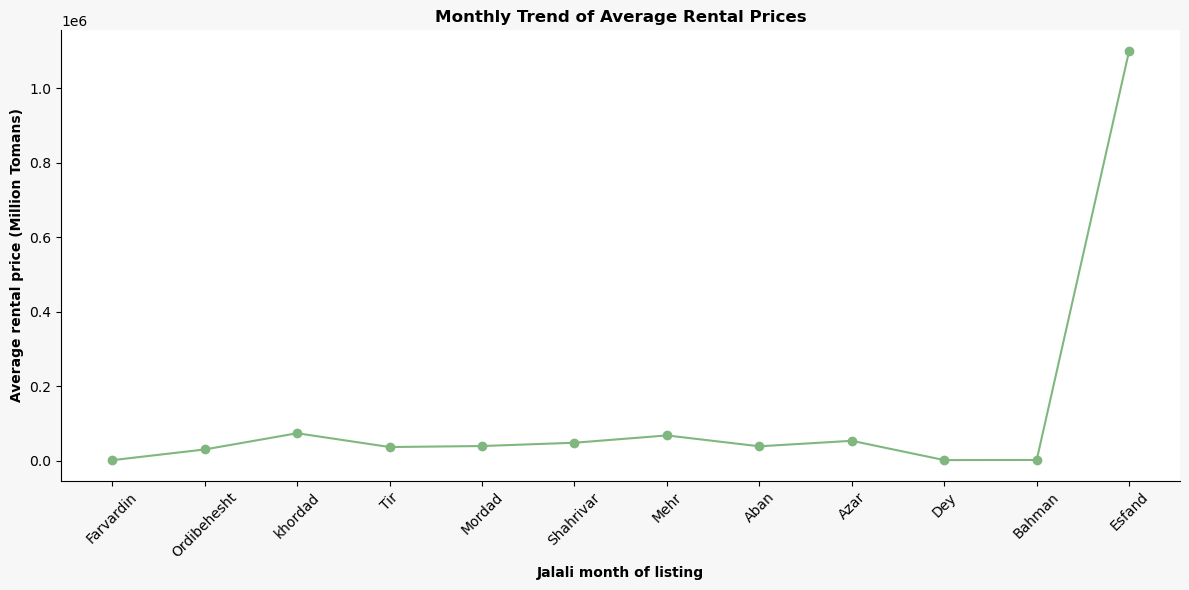

In [15]:
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#F7F7F7')

plt.plot(
    monthly_mean['month_label'],
    monthly_mean['rent_million'],
    marker='o',
    color='#7FB77E'
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Jalali month of listing', weight='bold')
plt.ylabel('Average rental price (Million Tomans)', weight='bold')
plt.title('Monthly Trend of Average Rental Prices', weight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
rent_df['jalali_month'].value_counts().sort_index()

jalali_month
1       941
2     31329
3     47030
4     51329
5     52459
6     47048
7     45894
8     39545
9     36016
10      319
11       74
12      101
Name: count, dtype: int64

## Question 7 

Problem Statement:
Nominal housing prices tend to increase over time; however, such an increse does not necessarily imply a rise in the real value of properties, as it may be driven by inflation.

For the period between 1400 to 1403 (Solar Hijiri), compute the real housing prices based on the nominal selling price ('price_value') and examine the trend of real prices over time.

Analytic Approach

In this analysis, prices are examined in nominal termms. The goal is to observe the trend of average selling prices over time, without adjusting for inflatian. Therefore, any observed increase reflects changes in nominal prices rather than real purchasing power.


In [23]:
sell_df = df[df['price_value'].notna()].copy()
sell_df['created_at_month'] = pd.to_datetime(sell_df['created_at_month'])

In [24]:
def to_jalali_year(dt):
    return jdatetime.date.fromgregorian(date = dt.date()).year

sell_df['jalali_year'] = sell_df['created_at_month'].apply(to_jalali_year)

sell_df = sell_df[sell_df['jalali_year'].between(1400, 1403)]

In [36]:
nominal_price_mean = sell_df.groupby('jalali_year')['price_value'].mean().reset_index()
nominal_price_mean['jalali_year'] = nominal_price_mean['jalali_year'].astype('Int16')
nominal_price_mean

,jalali_year,price_value
0,1400,1.066667e+09
1,1401,1.882049e+10
2,1402,7.918916e+09
3,1403,1.743388e+10


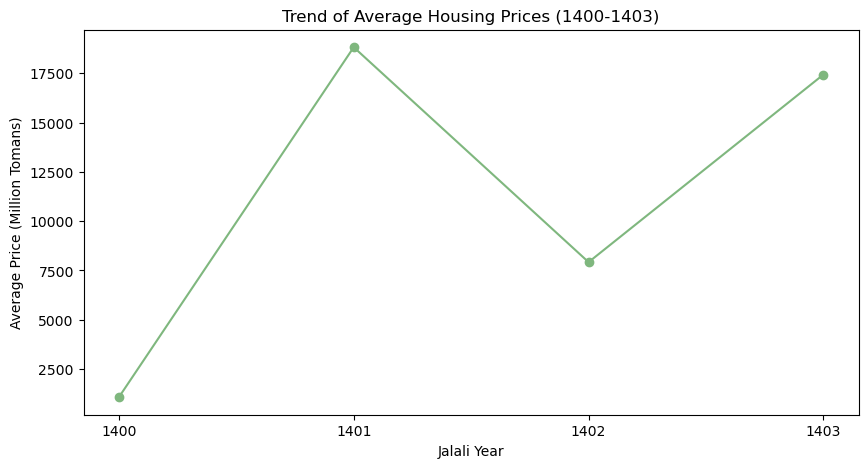

In [38]:
plt.figure(figsize = (10, 5))
plt.plot(nominal_price_mean['jalali_year'].astype(str), nominal_price_mean['price_value']/1000000, marker = 'o', color = '#7FB77E')
plt.xlabel('Jalali Year')
plt.ylabel('Average Price (Million Tomans)')
plt.title('Trend of Average Housing Prices (1400-1403)')
plt.show()